In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# > ***Exploring Test Size Impact on Decision Tree Performance Using Adjusted Rand Index***

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics.cluster import adjusted_rand_score
import matplotlib.pyplot as plt

In [3]:
iris = load_iris()
# print(iris)

In [4]:
X, y = iris.data, iris.target

print(X.shape, len(y))

(150, 4) 150


In [5]:
clf = tree.DecisionTreeClassifier()

j = [0.2,0.3,0.4,0.5]
j1 = ["0.2","0.3","0.4","0.5"]
l2 = []


In [6]:
for i in j:
    X_train, test_x, y_train, y_test = train_test_split(X, y, test_size = i, random_state = 42)
    print(X_train.shape, test_x.shape)
    
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(test_x)
    
    l2.append(adjusted_rand_score(y_test, y_pred), )
    
    print("ARI for the iteration",1 , "for test size of", i, "is: ", adjusted_rand_score(y_test,y_pred))
    print(l2)
    print("")

(120, 4) (30, 4)
ARI for the iteration 1 for test size of 0.2 is:  1.0
[1.0]

(105, 4) (45, 4)
ARI for the iteration 1 for test size of 0.3 is:  1.0
[1.0, 1.0]

(90, 4) (60, 4)
ARI for the iteration 1 for test size of 0.4 is:  0.9100036172880218
[1.0, 1.0, 0.9100036172880218]

(75, 4) (75, 4)
ARI for the iteration 1 for test size of 0.5 is:  0.8326377004486236
[1.0, 1.0, 0.9100036172880218, 0.8326377004486236]



<function matplotlib.pyplot.show(close=None, block=None)>

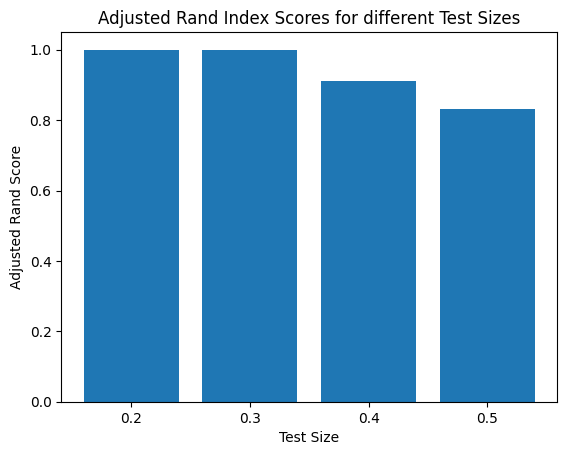

In [7]:
fig = plt.figure()
plt.bar(j1,l2)
plt.title("Adjusted Rand Index Scores for different Test Sizes")
plt.xlabel("Test Size")
plt.ylabel("Adjusted Rand Score")
plt.show